## Tasks
**Q1)**
- **Replace null values 'Age' column with ffill()**
- **Replace null values in 'Cabin and 'Embarked' columns with most occured value**

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic3=pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/titanic.csv')

In [3]:
titanic3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic3['Age']=titanic3['Age'].ffill()

In [5]:
titanic3['Age'].isnull().sum()

0

In [6]:
titanic3['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F2             3
              ..
A7             1
B41            1
F G63          1
E12            1
D30            1
Name: Cabin, Length: 147, dtype: int64

In [7]:
titanic3['Cabin']=titanic3['Cabin'].fillna('C23 C25 C27')

In [8]:
titanic3['Cabin'].isnull().sum()

0

In [9]:
titanic3['Cabin'].value_counts()

C23 C25 C27    691
B96 B98          4
G6               4
C22 C26          3
F2               3
              ... 
A7               1
B41              1
F G63            1
E12              1
D30              1
Name: Cabin, Length: 147, dtype: int64

In [10]:
titanic3['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
titanic3['Embarked']=titanic3['Embarked'].fillna('S')

In [12]:
titanic3['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
titanic3.isnull().sum().sum()

0

-`**After handling missing values, Convert Cabin, Embarked columns into numerical columns**

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
titanic3['Cabin']=le.fit_transform(titanic3['Cabin'])

In [17]:
titanic3['Sex']=le.fit_transform(titanic3['Sex'])

In [18]:
titanic3['Embarked']=le.fit_transform(titanic3['Embarked'])

In [19]:
titanic3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,63,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,63,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,63,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,63,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,19.0,1,2,W./C. 6607,23.4500,63,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,60,0


**Q2)**
- Display the plot of original data and robust scaler data for the advartisement data set link given below
https://raw.githubusercontent.com/nagamounika5/Datasets/master/Advertisement.csv

In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Advertisement.csv')

In [21]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [22]:
# lets check for null values
df.isnull().sum().sum()

0

As there are no null values we can proceed with the given data set

In [23]:
# As we got the indexes we no nedd the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'],axis=1)

In [24]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

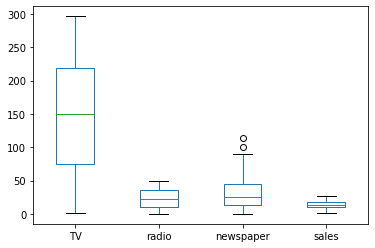

In [25]:
# Using box plot we get to know are there any outliers in the dataset
# There are two outliers in the newspaper column they are represented by two dots 
df.plot(kind='box')

- **Formula:**
    - (Xi - median(X))/(Q3(X) - Q1(X))

In [26]:
df['TV'].median()

149.75

In [27]:
df['TV'].quantile(0.25)

74.375

In [28]:
df['TV'].quantile(0.75)

218.825

In [29]:
(230.1-149.75)/(218.825-74.375)

0.5562478366216684

In the same way it calculates for all the vlaues of the dataset

In [30]:
from sklearn.preprocessing import RobustScaler

In [31]:
rs=RobustScaler()

In [32]:
rs2=rs.fit_transform(df)
rs2

array([[ 5.56247837e-01,  5.61205273e-01,  1.34312210e+00,
         1.30960854e+00],
       [-7.28625822e-01,  6.17702448e-01,  5.98145286e-01,
        -3.55871886e-01],
       [-9.17618553e-01,  8.66290019e-01,  1.34621329e+00,
        -5.12455516e-01],
       [ 1.21149187e-02,  6.93032015e-01,  1.01236476e+00,
         7.97153025e-01],
       [ 2.14953271e-01, -4.55743879e-01,  1.00927357e+00,
         0.00000000e+00],
       [-9.76462444e-01,  9.79284369e-01,  1.52241113e+00,
        -8.11387900e-01],
       [-6.38629283e-01,  3.72881356e-01, -6.95517774e-02,
        -1.56583630e-01],
       [-2.04569055e-01, -1.24293785e-01, -4.37403400e-01,
         4.27046263e-02],
       [-9.77154725e-01, -7.83427495e-01, -7.65069552e-01,
        -1.15302491e+00],
       [ 3.46486674e-01, -7.64595104e-01, -1.40649150e-01,
        -3.27402135e-01],
       [-5.79093112e-01, -6.44067797e-01, -4.79134467e-02,
        -6.12099644e-01],
       [ 4.49636552e-01,  4.14312618e-02, -6.72333849e-01,
      

In [33]:
rs2=pd.DataFrame(rs2,columns=df.columns)
rs2

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000
...,...,...,...,...
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594


In [37]:
import matplotlib.pyplot as plt

import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Density'>

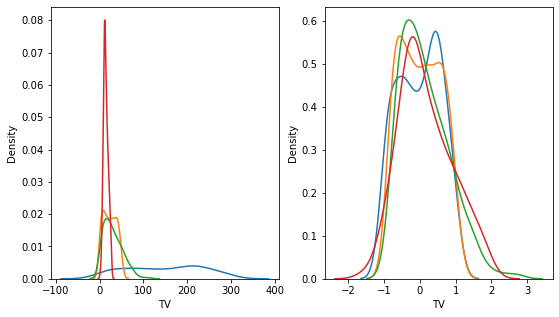

In [38]:
fig, (ax1,ax2) =plt.subplots(ncols=2 , figsize=(9,5))
sns.kdeplot(df['TV'], ax=ax1)
sns.kdeplot(df['radio'], ax=ax1)
sns.kdeplot(df['newspaper'], ax=ax1)
sns.kdeplot(df['sales'], ax=ax1)

sns.kdeplot(rs2['TV'], ax=ax2)
sns.kdeplot(rs2['radio'], ax=ax2)
sns.kdeplot(rs2['newspaper'], ax=ax2)
sns.kdeplot(rs2['sales'], ax=ax2)